In [3]:
import ultralytics
from ultralytics import YOLO
import pandas as pd
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
import random
import wandb
wandb.init(mode="disabled")
import shutil

In [16]:
#if os.path.exists('dataset'):
    #shutil.rmtree('dataset')
#shutil.copytree('D:\Datasets/axial_t1wce_2_class', 'dataset')

'dataset'

In [8]:
files = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/train')
random_file = random.choice(files)
random_file = os.path.splitext(random_file)[0]
print(random_file)

IMG_6483


HANNAN
(4032, 3024, 3)


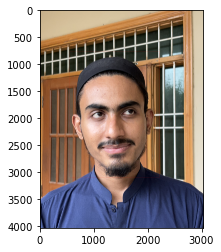

In [9]:
with open(os.path.join('C:/sameer/FYP_face_onyx/dataset/labels/train', f'{random_file}.txt'),'r') as f:
    labels = f.readlines()
    labels = labels[0].split(' ')
    f.close()

img = cv2.imread(os.path.join('C:/sameer/FYP_face_onyx/dataset/images/train', f'{random_file}.jpeg'), 1) 
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

faces_class, x, y, w, h = int(labels[0]), float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
x_pt1 = int((x - w/2) * img.shape[1])
y_pt1 = int((y - h/2) * img.shape[0])
x_pt2 = int((x + w/2) * img.shape[1])
y_pt2 = int((y + h/2) * img.shape[0])

if faces_class ==0:
    print("HANNAN")
    colour = (255, 0, 0)
elif faces_class == 1:
    print("ARHAM")
    colour = (0, 255, 0)
else:
    print("SAMEER")
    colour = (0,0, 255)
cv2.rectangle(img, (x_pt1, y_pt1), (x_pt2, y_pt2), colour, 1)

print(img.shape)
plt.imshow(img)

In [10]:
train_images = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/train')
test_images = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/test')
train_labels = os.listdir('C:/sameer/FYP_face_onyx/dataset/labels/train')
test_labels = os.listdir('C:/sameer/FYP_face_onyx/dataset/labels/test')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)

print(num_train_images, num_test_images)
print(num_train_labels, num_test_labels)

636 114
636 114


In [11]:
os.path.splitext(random_file)[0]
unlabelled = set(train_images) - set([os.path.splitext(file)[0] + '.jpeg' for file in train_labels])
print(set(train_images))
print(set([os.path.splitext(file)[0] + '.jpeg' for file in train_labels]))
# for image in unlabelled:
#     os.remove(f'E:/FYP/dataset/images/train/{image}')

{'IMG_6259.JPEG', 'IMG_6759.JPEG', 'IMG_6573.JPEG', 'IMG_6720.JPEG', 'IMG_6097.JPEG', 'IMG_6746.JPEG', 'IMG_6226.JPEG', 'IMG_6809.JPEG', 'IMG_6271.JPEG', 'IMG_6431.JPEG', 'IMG_6795.JPEG', 'IMG_6543.JPEG', 'IMG_6626.JPEG', 'IMG_6580.JPEG', 'IMG_6250.JPEG', 'IMG_7028.JPEG', 'IMG_7021.JPEG', 'IMG_6437.JPEG', 'IMG_6130.JPEG', 'IMG_6644.JPEG', 'IMG_6185.JPEG', 'IMG_7012.JPEG', 'IMG_6457.JPEG', 'IMG_6280.JPEG', 'IMG_6750.JPEG', 'IMG_6802.JPEG', 'IMG_6293.JPEG', 'IMG_6618.JPEG', 'IMG_7005.JPEG', 'IMG_6978.JPEG', 'IMG_6541.JPEG', 'IMG_6506.JPEG', 'IMG_6190.JPEG', 'IMG_6336.JPEG', 'IMG_6564.JPEG', 'IMG_6965.JPEG', 'IMG_6616.JPEG', 'IMG_6583.JPEG', 'IMG_6726.JPEG', 'IMG_6794.JPEG', 'IMG_6561.JPEG', 'IMG_6257.JPEG', 'IMG_6394.JPEG', 'IMG_6624.JPEG', 'IMG_6785.JPEG', 'IMG_6449.JPEG', 'IMG_6621.JPEG', 'IMG_6132.JPEG', 'IMG_6158.JPEG', 'IMG_6499.JPEG', 'IMG_6209.JPEG', 'IMG_6450.JPEG', 'IMG_6493.JPEG', 'IMG_6724.JPEG', 'IMG_6727.JPEG', 'IMG_6693.JPEG', 'IMG_6089.JPEG', 'IMG_6092.JPEG', 'IMG_6548.JPE

In [12]:
train_images = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/train')
test_images = os.listdir('C:/sameer/FYP_face_onyx/dataset/images/test')
train_labels = os.listdir('C:/sameer/FYP_face_onyx/dataset/labels/train')
test_labels = os.listdir('C:/sameer/FYP_face_onyx/dataset/labels/test')

num_train_images = len(train_images)
num_test_images = len(test_images)
num_train_labels = len(train_labels)
num_test_labels = len(test_labels)

print(num_train_images, num_test_images)
print(num_train_labels, num_test_labels)

636 114
636 114


In [13]:
val_split = int(num_train_images * 0.2)
val_images = random.sample(train_images, val_split)

if os.path.exists('C:/sameer/FYP_face_onyx/dataset/images/val'):
    shutil.rmtree('C:/sameer/FYP_face_onyx/dataset/images/val')
if os.path.exists('C:/sameer/FYP_face_onyx/dataset/labels/val'):
    shutil.rmtree('C:/sameer/FYP_face_onyx/dataset/labels/val')

os.mkdir('C:/sameer/FYP_face_onyx/dataset/images/val')
os.mkdir('C:/sameer/FYP_face_onyx/dataset/labels/val')

for image in val_images:
    shutil.move(f'C:/sameer/FYP_face_onyx/dataset/images/train/{image}', 'C:/sameer/FYP_face_onyx/dataset/images/val')

for image in val_images:
    label = os.path.splitext(image)[0] + '.txt'
    shutil.move(f'C:/sameer/FYP_face_onyx/dataset/labels/train/{label}', 'C:/sameer/FYP_face_onyx/dataset/labels/val')

In [14]:
pip install -r "C:/sameer/FYP_face_onyx/yolov5/requirements.txt"

  Attempting uninstall: pillow
    Found existing installation: Pillow 9.0.1
    Uninstalling Pillow-9.0.1:
      Successfully uninstalled Pillow-9.0.1
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\HAMMAD ABDULLAH\\anaconda3\\Lib\\site-packages\\~il\\_imaging.cp39-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [2]:
text = """
path: C:/sameer/FYP_face_onyx/dataset
train: C:/sameer/FYP_face_onyx/dataset/images/train
val: C:/sameer/FYP_face_onyx/dataset/images/val

# Classes
nc: 3
names: ['Hannan','Arham','Sameer']
"""
with open("./fixed_path.yaml", 'w') as file:
    file.write(text)

In [22]:
import torch


In [3]:
model = YOLO('yolov5su.pt')

In [4]:
results = model.train(data='fixed_path.yaml', epochs=100)

Ultralytics YOLOv8.2.67  Python-3.9.12 torch-2.4.0+cpu CPU (Intel Xeon E3-1270 V2 3.50GHz)
engine\trainer: task=detect, mode=train, model=yolov5su.pt, data=fixed_path.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes

C:\Users\HAMMAD ABDULLAH\anaconda3\lib\site-packages\ultralytics\engine\trainer.py:268: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(enabled=self.amp)
train: Scanning C:\sameer\FYP_face_onyx\dataset\labels\train.cache... 509 images, 0 backgrounds, 0 corrupt: 100%|██████
val: Scanning C:\sameer\FYP_face_onyx\dataset\labels\val.cache... 127 images, 0 backgrounds, 0 corrupt: 100%|██████████


Plotting labels to runs\detect\train\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 69 weight(decay=0.0), 76 weight(decay=0.0005), 75 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G     0.9844      1.659      1.383         40        640: 100%|██████████| 32/32 [12:34<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:59<0

                   all        127        127      0.897      0.993      0.995      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G     0.8438     0.7769      1.225         36        640: 100%|██████████| 32/32 [12:22<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:58<0

                   all        127        127       0.92      0.969      0.995      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.9062     0.6804      1.253         36        640: 100%|██████████| 32/32 [12:14<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.723      0.782      0.837      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G     0.8572     0.6249      1.216         32        640: 100%|██████████| 32/32 [12:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:57<0

                   all        127        127      0.409      0.815      0.727      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G     0.8681     0.6396      1.237         29        640: 100%|██████████| 32/32 [12:03<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.759      0.935      0.874      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.8512     0.5856      1.216         32        640: 100%|██████████| 32/32 [12:19<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:58<0

                   all        127        127      0.921      0.992      0.989        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.8353     0.5311      1.197         35        640: 100%|██████████| 32/32 [12:37<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.813       0.97      0.926      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G     0.8374     0.5343      1.213         32        640: 100%|██████████| 32/32 [12:41<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127       0.76      0.938      0.985      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.8277     0.5023      1.194         34        640: 100%|██████████| 32/32 [12:36<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.909      0.603      0.665      0.518



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.8428     0.5072      1.199         29        640: 100%|██████████| 32/32 [12:39<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.887      0.961      0.988      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G     0.8029     0.5042      1.173         33        640: 100%|██████████| 32/32 [12:05<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.997          1      0.995      0.834



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.8045     0.4502      1.181         40        640: 100%|██████████| 32/32 [12:02<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995       0.83



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G     0.8107     0.4505      1.175         33        640: 100%|██████████| 32/32 [11:57<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127       0.99          1      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.7808     0.4535      1.163         32        640: 100%|██████████| 32/32 [12:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.988          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.7706       0.44      1.148         35        640: 100%|██████████| 32/32 [12:00<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.864      0.948      0.977      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.7694     0.4367      1.166         33        640: 100%|██████████| 32/32 [11:55<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.968      0.981      0.989      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G      0.777     0.4263      1.167         30        640: 100%|██████████| 32/32 [11:56<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127        0.9      0.984      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.7715     0.4271      1.161         32        640: 100%|██████████| 32/32 [11:57<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.7698     0.4212      1.162         30        640: 100%|██████████| 32/32 [11:57<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.836



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.7735     0.4205      1.155         36        640: 100%|██████████| 32/32 [11:58<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.7611      0.409      1.151         36        640: 100%|██████████| 32/32 [12:06<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.996          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.7491     0.4062      1.162         31        640: 100%|██████████| 32/32 [11:58<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.7224     0.3899      1.139         30        640: 100%|██████████| 32/32 [11:55<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.997          1      0.995      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.7194      0.389      1.128         33        640: 100%|██████████| 32/32 [12:02<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.7388     0.3873      1.149         27        640: 100%|██████████| 32/32 [11:47<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.7443     0.3964      1.139         32        640: 100%|██████████| 32/32 [11:52<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.997          1      0.995      0.859



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.7472     0.4011       1.14         28        640: 100%|██████████| 32/32 [11:53<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.7368     0.3901      1.137         37        640: 100%|██████████| 32/32 [12:27<00:00, 23.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.7244     0.3814      1.134         27        640: 100%|██████████| 32/32 [11:54<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G      0.755       0.39      1.131         36        640: 100%|██████████| 32/32 [11:50<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.843



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.7394     0.3832      1.135         32        640: 100%|██████████| 32/32 [11:47<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.7429      0.385      1.126         39        640: 100%|██████████| 32/32 [11:46<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G      0.698     0.3719      1.119         34        640: 100%|██████████| 32/32 [11:52<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.7402     0.3846      1.145         24        640: 100%|██████████| 32/32 [11:48<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.7109     0.3587       1.11         26        640: 100%|██████████| 32/32 [11:47<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.853



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.7106     0.3515      1.118         35        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G      0.729     0.3652       1.12         28        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.7011     0.3476        1.1         35        640: 100%|██████████| 32/32 [11:43<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.7026     0.3551       1.12         29        640: 100%|██████████| 32/32 [11:43<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.845



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G      0.716     0.3565      1.116         39        640: 100%|██████████| 32/32 [11:47<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.7008     0.3524      1.109         29        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.857



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.7187     0.3538      1.116         38        640: 100%|██████████| 32/32 [11:43<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.7285     0.3483      1.145         26        640: 100%|██████████| 32/32 [11:44<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.7203     0.3495      1.133         37        640: 100%|██████████| 32/32 [11:44<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.7043     0.3441      1.123         32        640: 100%|██████████| 32/32 [11:40<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G     0.6998      0.334      1.105         34        640: 100%|██████████| 32/32 [11:42<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.6955     0.3409      1.102         34        640: 100%|██████████| 32/32 [11:43<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.999          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.7004     0.3372      1.112         40        640: 100%|██████████| 32/32 [11:43<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G      0.697     0.3469      1.109         35        640: 100%|██████████| 32/32 [11:42<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G      0.698     0.3393      1.115         38        640: 100%|██████████| 32/32 [11:42<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.999          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.6944     0.3235      1.105         31        640: 100%|██████████| 32/32 [12:14<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.6696     0.3269      1.085         32        640: 100%|██████████| 32/32 [11:41<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G      0.673     0.3196      1.096         35        640: 100%|██████████| 32/32 [11:43<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.852



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.6662      0.322        1.1         37        640: 100%|██████████| 32/32 [11:41<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G     0.6724     0.3265      1.097         38        640: 100%|██████████| 32/32 [11:39<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.999          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.6777       0.33      1.102         32        640: 100%|██████████| 32/32 [11:43<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.6927     0.3343      1.123         34        640: 100%|██████████| 32/32 [11:42<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.6963     0.3316      1.122         38        640: 100%|██████████| 32/32 [11:42<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G       0.67     0.3168      1.087         29        640: 100%|██████████| 32/32 [11:44<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.6753     0.3193      1.097         37        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.6738     0.3126      1.088         36        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.999          1      0.995      0.863



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.6546     0.3136      1.087         37        640: 100%|██████████| 32/32 [11:44<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.6686     0.3196      1.099         24        640: 100%|██████████| 32/32 [11:42<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.6588     0.3108      1.091         31        640: 100%|██████████| 32/32 [11:43<00:00, 21.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127          1          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.6761     0.3253      1.107         25        640: 100%|██████████| 32/32 [11:49<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995       0.86



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G      0.668     0.3144      1.092         32        640: 100%|██████████| 32/32 [11:46<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.6486     0.3108      1.082         39        640: 100%|██████████| 32/32 [11:44<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.6695     0.3086      1.095         30        640: 100%|██████████| 32/32 [11:48<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.998          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G      0.659     0.3027      1.084         35        640: 100%|██████████| 32/32 [11:46<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.6639     0.2993      1.096         30        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.6592     0.3036      1.087         35        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127          1          1      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G      0.646     0.3037      1.091         37        640: 100%|██████████| 32/32 [11:48<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127          1          1      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.6565     0.3008      1.094         30        640: 100%|██████████| 32/32 [11:47<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.6557     0.2966      1.085         32        640: 100%|██████████| 32/32 [11:44<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.6658     0.3004      1.091         34        640: 100%|██████████| 32/32 [11:43<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:55<0

                   all        127        127      0.999          1      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G      0.651     0.3018      1.073         30        640: 100%|██████████| 32/32 [11:43<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127          1          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.6591     0.2974      1.094         28        640: 100%|██████████| 32/32 [11:47<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127          1          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G     0.6385     0.2972      1.089         32        640: 100%|██████████| 32/32 [11:52<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.6428     0.2928      1.076         30        640: 100%|██████████| 32/32 [11:46<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G      0.653     0.2946      1.086         31        640: 100%|██████████| 32/32 [11:46<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.6442     0.2888       1.07         34        640: 100%|██████████| 32/32 [11:50<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.6608      0.303      1.094         33        640: 100%|██████████| 32/32 [11:49<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G      0.632     0.2884      1.072         40        640: 100%|██████████| 32/32 [11:48<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G      0.641     0.2878      1.076         34        640: 100%|██████████| 32/32 [11:53<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      0.625     0.2815      1.066         36        640: 100%|██████████| 32/32 [11:55<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.869



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.6308     0.2802      1.079         29        640: 100%|██████████| 32/32 [11:54<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G     0.6242     0.2778      1.063         29        640: 100%|██████████| 32/32 [11:55<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.6419      0.278      1.079         25        640: 100%|██████████| 32/32 [11:55<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.6294      0.281      1.063         32        640: 100%|██████████| 32/32 [11:56<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.6376      0.279      1.061         30        640: 100%|██████████| 32/32 [11:51<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127          1          1      0.995      0.865


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.5963     0.2417      1.135         13        640: 100%|██████████| 32/32 [11:47<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.5948     0.2395      1.134         13        640: 100%|██████████| 32/32 [11:46<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G      0.596      0.235      1.139         13        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.5929     0.2369      1.143         13        640: 100%|██████████| 32/32 [11:45<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.867



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.5956     0.2325      1.135         13        640: 100%|██████████| 32/32 [11:50<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.5933     0.2327      1.123         13        640: 100%|██████████| 32/32 [11:50<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:57<0

                   all        127        127      0.999          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.5926     0.2311      1.124         13        640: 100%|██████████| 32/32 [11:47<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.999          1      0.995      0.872



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.5859     0.2315      1.125         13        640: 100%|██████████| 32/32 [11:50<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995      0.868



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.5914     0.2298      1.117         13        640: 100%|██████████| 32/32 [11:53<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:56<0

                   all        127        127      0.998          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.5894     0.2251      1.114         13        640: 100%|██████████| 32/32 [11:51<00:00, 22.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:57<0

                   all        127        127      0.999          1      0.995       0.87



100 epochs completed in 21.409 hours.
Optimizer stripped from runs\detect\train\weights\last.pt, 18.5MB
Optimizer stripped from runs\detect\train\weights\best.pt, 18.5MB

Validating runs\detect\train\weights\best.pt...
Ultralytics YOLOv8.2.67  Python-3.9.12 torch-2.4.0+cpu CPU (Intel Xeon E3-1270 V2 3.50GHz)
YOLOv5s summary (fused): 193 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:53<0


                   all        127        127      0.999          1      0.995      0.873
                Hannan         42         42          1          1      0.995      0.854
                 Arham         44         44      0.998          1      0.995      0.884
                Sameer         41         41      0.999          1      0.995      0.881
Speed: 2.6ms preprocess, 278.7ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs\detect\train


In [9]:
print(results)

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000001D2C13B4BB0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          

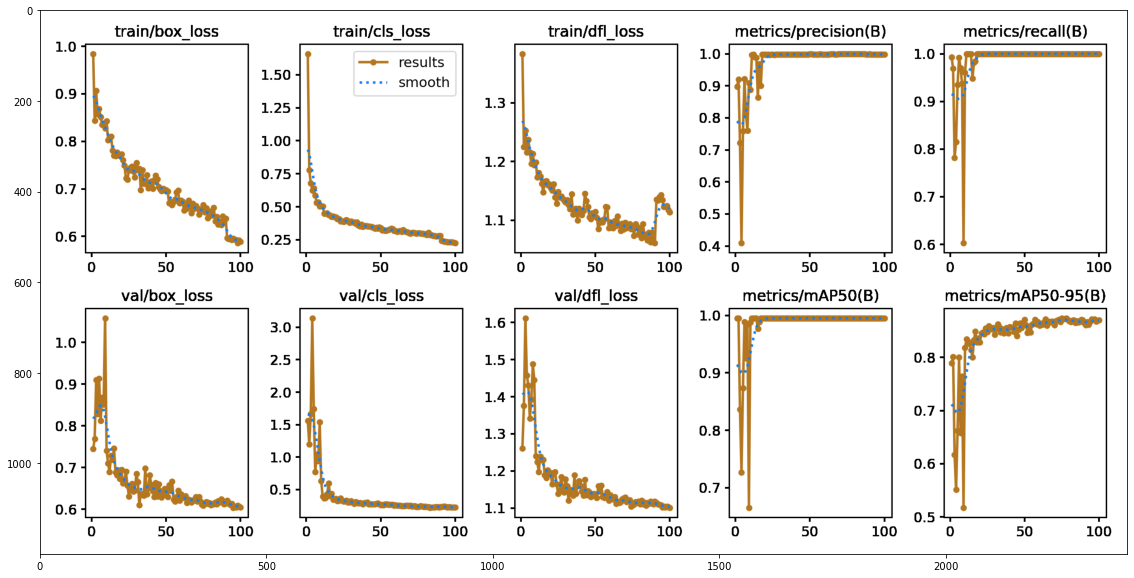

In [12]:
#training_save_dir = 'C:/kaggle/' + str(results.save_dir)
#print(training_save_dir)

plt.figure(figsize=(20, 10))
img = cv2.imread('C:/sameer/FYP_face_onyx/runs/detect/train/results.png')
plt.imshow(img)
plt.show()

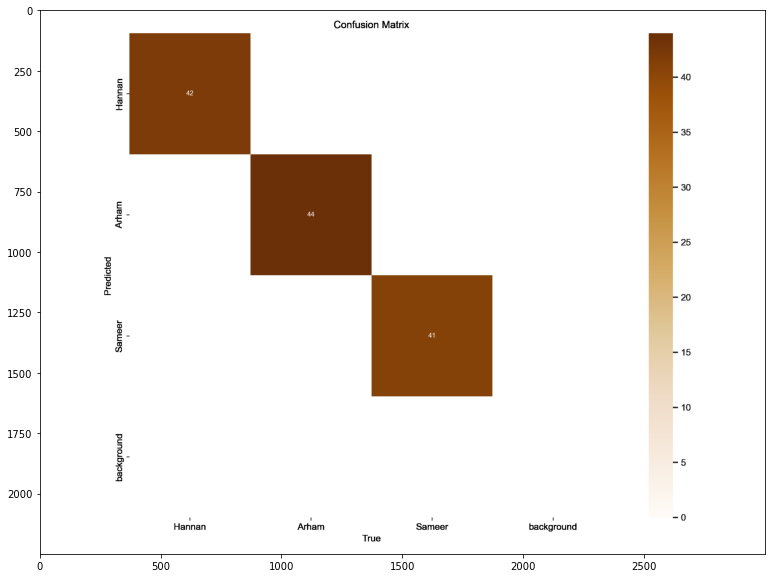

In [11]:
plt.figure(figsize=(20, 10))
img = cv2.imread('C:/sameer/FYP_face_onyx/runs/detect/train/confusion_matrix.png')
plt.imshow(img)
plt.show()

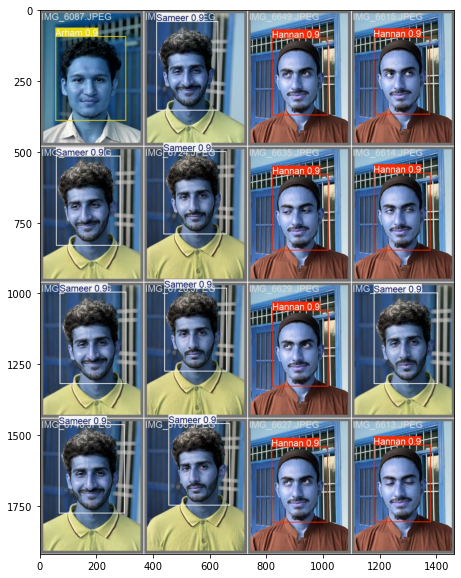

In [13]:
plt.figure(figsize=(20, 10))
img = cv2.imread('C:/sameer/FYP_face_onyx/runs/detect/train/val_batch0_pred.jpg')
plt.imshow(img)
plt.show()

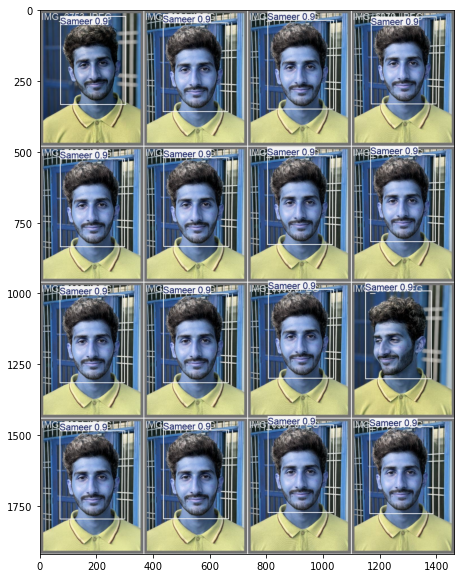

In [14]:
plt.figure(figsize=(20, 10))
img = cv2.imread('C:/sameer/FYP_face_onyx/runs/detect/train/val_batch1_pred.jpg')
plt.imshow(img)
plt.show()

In [9]:
trained_model = YOLO('C:/sameer/FYP_face_onyx/runs/detect/train/weights/best.pt')
predictions = trained_model.predict(
    source="C:/sameer/FYP_face_onyx/dataset/images/test",
    conf=0.4, save_txt=True, save_conf=True)


image 1/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6338.JPEG: 640x480 1 Arham, 581.1ms
image 2/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6339.JPEG: 640x480 1 Arham, 455.7ms
image 3/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6340.JPEG: 640x480 1 Arham, 517.5ms
image 4/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6341.JPEG: 640x480 1 Arham, 454.8ms
image 5/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6342.JPEG: 640x480 1 Arham, 471.0ms
image 6/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6343.JPEG: 640x480 1 Arham, 534.0ms
image 7/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6344.JPEG: 640x480 1 Arham, 470.8ms
image 8/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6345.JPEG: 640x480 1 Arham, 470.9ms
image 9/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6346.JPEG: 640x480 1 Arham, 455.8ms
image 10/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_6347.JPEG: 640x480 1 Arham, 471.3ms
image 11/114 C:\sameer\FYP_face_onyx\d

image 86/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7060.JPEG: 640x480 1 Sameer, 596.2ms
image 87/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7061.JPEG: 640x480 1 Sameer, 753.0ms
image 88/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7062.JPEG: 640x480 1 Sameer, 706.2ms
image 89/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7063.JPEG: 640x480 1 Sameer, 627.8ms
image 90/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7064.JPEG: 640x480 1 Sameer, 659.7ms
image 91/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7065.JPEG: 640x480 1 Sameer, 644.0ms
image 92/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7066.JPEG: 640x480 1 Sameer, 1113.9ms
image 93/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7067.JPEG: 640x480 1 Sameer, 671.2ms
image 94/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7068.JPEG: 640x480 1 Sameer, 627.3ms
image 95/114 C:\sameer\FYP_face_onyx\dataset\images\test\IMG_7069.JPEG: 640x480 1 Sameer, 502.1ms
image 96/114 C:\sam

In [10]:
predictions_save_dir = 'C:/sameer/FYP_face_onyx/' + predictions[0].save_dir + '/labels'

In [11]:
def draw_bbox(file_path, filename, img):
    with open(os.path.join(file_path, f'{filename}.txt'),'r') as f:
        labels = f.readlines()
        labels = labels[0].split(' ')
        print(labels)
        f.close()

    faces_class, x, y, w, h = int(labels[0]), float(labels[1]), float(labels[2]), float(labels[3]), float(labels[4])
    x_pt1 = int((x - w/2) * img.shape[1])
    y_pt1 = int((y - h/2) * img.shape[0])
    x_pt2 = int((x + w/2) * img.shape[1])
    y_pt2 = int((y + h/2) * img.shape[0])

    if faces_class == 0:
        colour = (255, 0, 0)
        label = 'Hannan'
    elif faces_class ==1:
        colour = (0, 255, 0)
        label = 'Arham'
    elif faces_class == 2:
        colour = (0, 0, 255)
        label = 'Sameer'

    if len(labels) > 5:
        prob = float(labels[5])
        prob = round(prob, 1)
        prob = str(prob)
        label = label + ' ' + prob

    cv2.rectangle(img, (x_pt1, y_pt1), (x_pt2, y_pt2), colour, 5)
    cv2.putText(img, label, (x_pt1, y_pt1 -100), cv2.FONT_HERSHEY_SIMPLEX, 5, colour, 15)

['2', '0.529509', '0.464215', '0.665906', '0.670534', '0.892134\n']
['2', '0.569773', '0.460630', '0.727034', '0.677165']


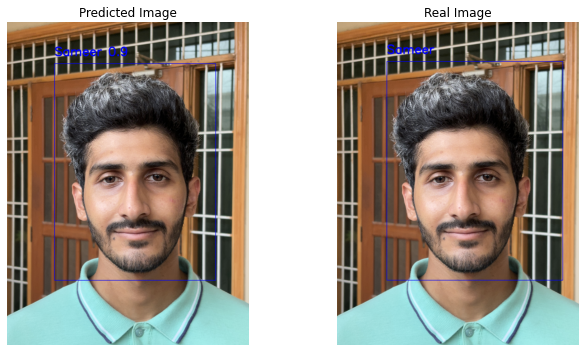

In [12]:
files = os.listdir('C:/sameer/FYP_face_onyx/runs/detect/predict/labels')
random_file = random.choice(files)
random_file = os.path.splitext(random_file)[0]

img_pred = cv2.imread(f'C:/sameer/FYP_face_onyx/dataset/images/test/{random_file}.jpeg', 1)
img_pred = cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)
draw_bbox(predictions_save_dir, random_file, img_pred)

img_real = cv2.imread(os.path.join('C:/sameer/FYP_face_onyx/dataset/images/test', f'{random_file}.jpeg'), 1)
img_real = cv2.cvtColor(img_real, cv2.COLOR_BGR2RGB)
draw_bbox('dataset/labels/test', random_file, img_real)

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(img_pred)
axes[0].set_title('Predicted Image')
axes[0].axis('off')

axes[1].imshow(img_real)
axes[1].set_title('Real Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()